# Model training

In [2]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"
TRAIN_DIR = "30"
LOG_FILE = "log30.csv"

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{TRAIN_DIR}\\train_datalist.pickle',
                         batch_fraction=0.2,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{TRAIN_DIR}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
model = GNN()

train_params = {
    'opt_name': 'AdamW',
    'n_epoch': 200,
    'lr': 5.e-3,
    'weight_decay': 1.e-4,
    'loss_fname': 'mseLoss',
    'lr_decay_rate': 0.99
}

train(model=model,
      train_params=train_params,
      train_loader=train_loader,
      val_loader=val_loader,
      logfile_dir=f'{MAIN_DIR}\\{LOG_FILE}',
      logfig_dir=f'{MAIN_DIR}\\fig_log.png',
      )

[Epoch 0]
[Loss : 1.0039165019989014]
[meanARE : 1.0283335447311401]
[Learning rate : 5e-05]
[Epoch 5]
[Loss : 1.0004993677139282]
[meanARE : 1.0256342887878418]
[Learning rate : 0.0003]
[Epoch 10]
[Loss : 0.9706396460533142]
[meanARE : 1.1342195272445679]
[Learning rate : 0.00055]
[Epoch 15]
[Loss : 0.71918785572052]
[meanARE : 2.2180285453796387]
[Learning rate : 0.0008]
[Epoch 20]
[Loss : 0.2993980348110199]
[meanARE : 3.1436479091644287]
[Learning rate : 0.00105]
[Epoch 25]
[Loss : 0.15074896812438965]
[meanARE : 2.2559916973114014]
[Learning rate : 0.0013000000000000002]
[Epoch 30]
[Loss : 0.11299760639667511]
[meanARE : 1.9257720708847046]
[Learning rate : 0.00155]
[Epoch 35]
[Loss : 0.09423775225877762]
[meanARE : 1.7183032035827637]
[Learning rate : 0.0018]
[Epoch 40]
[Loss : 0.08672144263982773]
[meanARE : 1.5836478471755981]
[Learning rate : 0.0020499999999999997]
[Epoch 45]
[Loss : 0.08153140544891357]
[meanARE : 1.4666846990585327]
[Learning rate : 0.0023]
[Epoch 50]
[Loss 

## Save model

In [4]:
import torch

torch.save(model.state_dict(), f'{MAIN_DIR}\\trained_models\\{TRAIN_DIR}\\model.pt')

tensor(0.0577, grad_fn=<MseLossBackward0>)
tensor(0.1675, grad_fn=<MeanBackward0>)


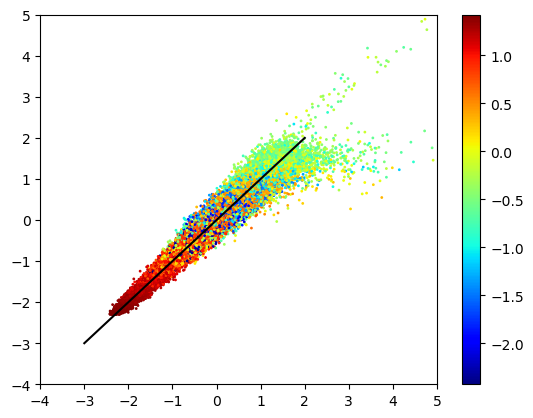

In [12]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
iterer = iter(train_loader)
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, c=train_batch.x[:,16], cmap='jet')
plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

tensor(0.0663, grad_fn=<MseLossBackward0>)
tensor(0.1814, grad_fn=<MeanBackward0>)


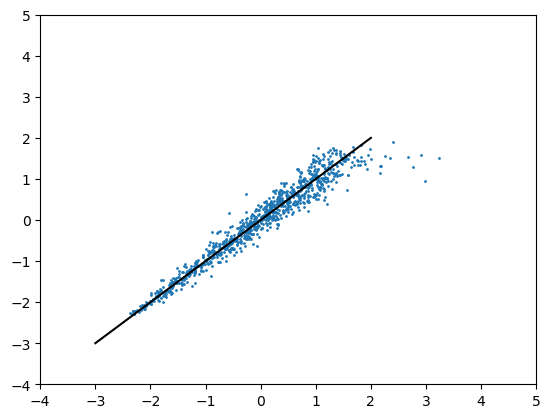

In [106]:
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, cmap='jet')
# plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))